## iris data classification with # KNN Algorithm.

### import Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data Preparation

In [33]:
# 붓꽃 데이터 CSV 파일 읽기
file_path = "C:/Users/plo55/Downloads/iris.csv"  # 본인이 iris.csv를 저장한 경로를 입력합니다.
df = pd.read_csv(file_path)

# 데이터 준비
X = df.drop('Name', axis=1) # 데이터 특성 (Name 컬럼 제외)
Y = df['Name'] # 레이블 (Name 컬럼)

# 데이터 분할 (Training Data 70%와 Test Data 30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 데이터 표준화
# KNN 알고리즘은 데이터 포인트 간의 거리를 기반으로 동작합니다.
# 거리를 계산할 때, 모든 특성(Feature)이 동일한 스케일을 가지지 않으면
# 특정 특성이 거리 계산에 지나치게 큰 영향을 미칠 수 있기 때문에 알고리즘을 적용하기 전에 표준화를 진행해야 한다.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Search for the optimal K-value(1~20)

In [40]:
# K값 범위 설정
k_range = range(1, 21)  # 1부터 20까지

# 각 K값에 대한 정확도 저장 리스트
cv_scores = []

# 교차 검증을 통해 최적의 K 찾기
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring="accuracy")  # 10-fold 교차 검증
    cv_scores.append(scores.mean())  # 평균 정확도 저장

optimal_k = k_range[np.argmax(cv_scores)]
print(f"최적의 K 값: {optimal_k}")

# 최적의 K값으로 KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, Y_train)

# 예측 수행
Y_pred = knn.predict(X_test)

# 정확도 출력
print("\n📌 최적의 K 값으로 평가")
print("Accuracy:", accuracy_score(Y_test, Y_pred))

# 정밀한 평가 지표 출력
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

# 혼동 행렬 출력
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

최적의 K 값: 14

📌 최적의 K 값으로 평가
Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## Accuracy according to K-value(1~20)

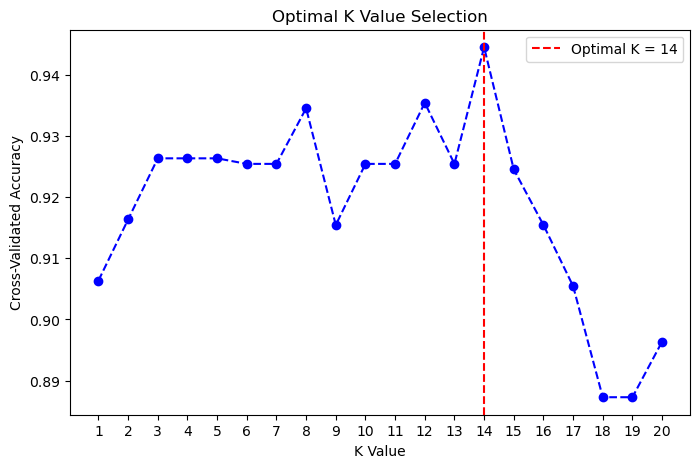

In [44]:
# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('K Value')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Optimal K Value Selection')
plt.xticks(range(1, 21))
plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.legend()
plt.show()


"""
# K값에 따른 정확도 변화 확인(교차 검증 X)
k_values = range(1, 21)
accuracy_list = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy_list.append(accuracy_score(Y_test, Y_pred))

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_list, marker='o', linestyle='dashed', color='b')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K Value vs Accuracy')
plt.xticks(range(1, 21))
plt.show()
"""